In [1]:
from datetime import datetime
import pandas as pd
import logging
from collections import Counter
import numpy as np
from pycaret.classification import ClassificationExperiment

- The dataset is from the [American Express - Default Prediction](https://www.kaggle.com/competitions/amex-default-prediction/overview)  kaggle competition. 
- Goal of the competition is predict credit default based on the customer's monthly profile.
- For each customer, 189 features are provided in the dataset

In [2]:
train_data = pd.read_feather("../data/train_data.ftr")

In [3]:
train_data.shape

(5531451, 191)

In [4]:
train_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Columns: 191 entries, customer_ID to target
dtypes: category(11), datetime64[ns](1), float16(177), int64(1), object(1)
memory usage: 2.0+ GB


In [6]:
# list of column names and their data types
train_data

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.979492,0.416016,0.020813,0.828125,0.003487,0.090759,0.005341,0.025146,...,NaN,NaN,0.006836,0.003679,0.000457,NaN,0.000906,0.001497,0.002775,0
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.984863,0.296631,0.007210,0.812500,0.005905,0.079895,0.002243,0.023697,...,NaN,NaN,0.003309,0.007095,0.007858,NaN,0.002777,0.008224,0.008858,0
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.982910,0.444092,0.013153,0.815430,0.003456,0.100525,0.002111,0.012344,...,NaN,NaN,0.009956,0.009995,0.001088,NaN,0.005692,0.006775,0.005566,0
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.969727,0.442627,0.009857,1.003906,0.005116,0.101807,0.009933,0.008575,...,NaN,NaN,0.005543,0.006565,0.009880,NaN,0.008125,0.001168,0.003983,0


In [7]:
# Ensure date column is in datetime format
train_data["S_2"] = pd.to_datetime(train_data["S_2"])

# Sort values by date
train_data = train_data.sort_values("S_2")

The features for each customer are divided into the following 5 categories:
  1. D_* = Delinquency variables
  2. S_* = Spend variables
  3. P_* = Payment variables
  4. B_* = Balance variables
  5. R_* = Risk variables

In [8]:
count_of_feature_type = Counter(
    [x.split("_")[0] for x in train_data.columns if x not in ["customer_ID", "target"]]
)
count_of_feature_type = pd.DataFrame(count_of_feature_type, index=["count"]).T
count_of_feature_type

,count
S,22
P,3
D,96
B,40
R,28


### Imbalance Data

0    0.750903
1    0.249097
Name: target, dtype: float64


<AxesSubplot: title={'center': 'Target Distribution'}>

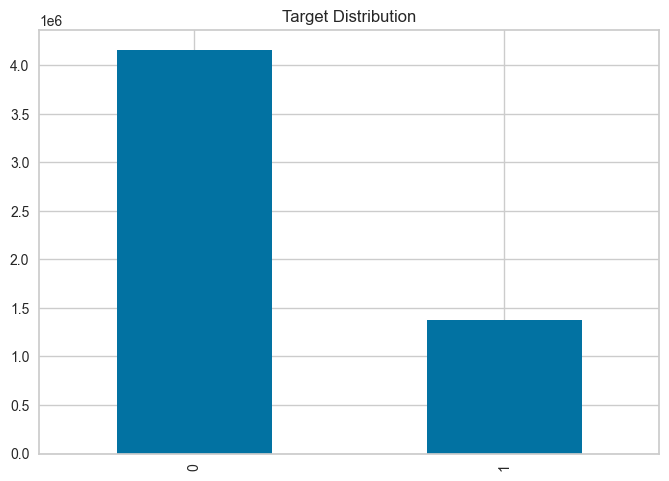

In [9]:
# calculate the percentage of training data that is 1 and 0
print(train_data["target"].value_counts(normalize=True))
train_data["target"].value_counts().plot(kind="bar", title="Target Distribution")

In [10]:
train_data = train_data.sort_values(by=["customer_ID", "S_2"])

In [11]:
# pick random sample of customer_IDs from train_data
np.random.seed(42)
customer_ID_rand = np.random.choice(train_data["customer_ID"], 10000, replace=False)

In [12]:
train_rndm_sample = train_data[train_data["customer_ID"].isin(customer_ID_rand)]

In [13]:
# customer_IDs that are not in the random sample for the training data
customer_ID_not_train = list(
    set(train_data["customer_ID"]).difference(set(customer_ID_rand))
)

# pick random sample of customer_IDs from customer_ID_not_train
customer_ID_test_rnd = np.random.choice(customer_ID_not_train, 10000, replace=False)

# test data based on the random sample of customer_IDs
test_rndm_sample = train_data[
    train_data["customer_ID"].isin(customer_ID_test_rnd)
].sort_values(by=["customer_ID", "S_2"])

In [14]:
test_rndm_sample.shape

(120252, 191)

In [15]:
# drop customer_ID and S_2 from train and test data
train_rndm_sample.drop(["customer_ID", "S_2"], axis=1, inplace=True)
test_rndm_sample.drop(["customer_ID", "S_2"], axis=1, inplace=True)

0    0.767212
1    0.232788
Name: target, dtype: float64


<AxesSubplot: title={'center': 'Target Distribution'}>

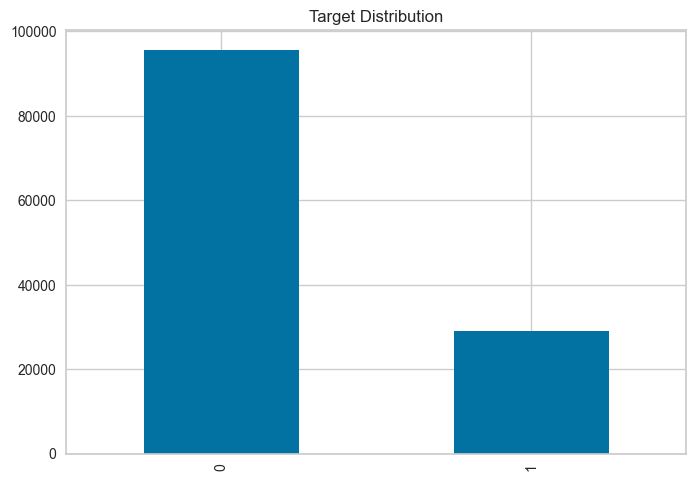

In [16]:
# calculate the percentage of training data sample that is 1 and 0
print(train_rndm_sample["target"].value_counts(normalize=True))
train_rndm_sample["target"].value_counts().plot(kind="bar", title="Target Distribution")

In [17]:
s = ClassificationExperiment()
s.setup(
    data=train_rndm_sample,
    target="target",
    normalize=True,
    session_id=123,
    fix_imbalance=True,
    fold=5,
    feature_selection=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.9
)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(124538, 189)"
4,Transformed data shape,"(171126, 38)"
5,Transformed train set shape,"(133764, 38)"
6,Transformed test set shape,"(37362, 38)"
7,Ordinal features,4
8,Numeric features,177
9,Categorical features,11


In [18]:
s.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [19]:
number_of_models = len(s.models())
compare_models_all = s.compare_models(n_select=number_of_models)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9661,0.9937,0.9450,0.9124,0.9284,0.9061,0.9064,1.3660
knn,K Neighbors Classifier,0.9525,0.9877,0.9651,0.8510,0.9045,0.8731,0.8761,3.1660
catboost,CatBoost Classifier,0.9366,0.9791,0.8557,0.8699,0.8628,0.8216,0.8216,4.2640
rf,Random Forest Classifier,0.9284,0.9769,0.9141,0.8049,0.8560,0.8086,0.8115,5.1380
xgboost,Extreme Gradient Boosting,0.9217,0.9709,0.8312,0.8321,0.8317,0.7806,0.7806,5.9280
lightgbm,Light Gradient Boosting Machine,0.8946,0.9537,0.7998,0.7601,0.7794,0.7103,0.7107,0.6360
dt,Decision Tree Classifier,0.8710,0.8327,0.7609,0.7073,0.7331,0.6482,0.6490,1.4940
gbc,Gradient Boosting Classifier,0.8608,0.9307,0.8303,0.6598,0.7353,0.6425,0.6503,15.6040
ada,Ada Boost Classifier,0.8492,0.9204,0.8203,0.6367,0.7169,0.6163,0.6255,3.3780
lr,Logistic Regression,0.8460,0.9286,0.8697,0.6208,0.7244,0.6216,0.6387,4.3120


Processing:   0%|          | 0/84 [00:00<?, ?it/s]

In [20]:
pred_scores_df = pd.DataFrame()
for x in compare_models_all:
    df_pred = s.predict_model(
        x,
        data=test_rndm_sample,
    )
    x = s.pull()
    pred_scores_df = pd.concat([pred_scores_df, x])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8630,0.9247,0.7812,0.7013,0.7391,0.6466,0.6483


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8162,0.8493,0.7435,0.6061,0.6678,0.5425,0.5479


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8607,0.9228,0.7059,0.7260,0.7158,0.6235,0.6237


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8604,0.9220,0.7868,0.6930,0.7369,0.6424,0.6448


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8575,0.9190,0.7027,0.7180,0.7103,0.6158,0.6159


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8629,0.9260,0.7419,0.7164,0.7289,0.6372,0.6374


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8051,0.7511,0.6439,0.6005,0.6215,0.4904,0.4910


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8546,0.9234,0.8284,0.6670,0.7390,0.6398,0.6471


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8443,0.9163,0.8226,0.6467,0.7242,0.6178,0.6265


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8467,0.9248,0.8579,0.6437,0.7355,0.6306,0.6435


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8427,0.8502,0.8652,0.6346,0.7322,0.6245,0.6396


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8427,0.9238,0.8652,0.6346,0.7322,0.6245,0.6396


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8337,0.8493,0.8803,0.6156,0.7245,0.6107,0.6307


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.8393,0.9026,0.8039,0.6408,0.7131,0.6035,0.6110


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.8333,0.8964,0.7948,0.6306,0.7032,0.5895,0.5971


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.7515,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [21]:
display(pred_scores_df.sort_values(by=["Accuracy"], ascending=False))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8630,0.9247,0.7812,0.7013,0.7391,0.6466,0.6483
0,Light Gradient Boosting Machine,0.8629,0.9260,0.7419,0.7164,0.7289,0.6372,0.6374
0,CatBoost Classifier,0.8607,0.9228,0.7059,0.7260,0.7158,0.6235,0.6237
0,Random Forest Classifier,0.8604,0.9220,0.7868,0.6930,0.7369,0.6424,0.6448
0,Extreme Gradient Boosting,0.8575,0.9190,0.7027,0.7180,0.7103,0.6158,0.6159
0,Gradient Boosting Classifier,0.8546,0.9234,0.8284,0.6670,0.7390,0.6398,0.6471
0,Logistic Regression,0.8467,0.9248,0.8579,0.6437,0.7355,0.6306,0.6435
0,Ada Boost Classifier,0.8443,0.9163,0.8226,0.6467,0.7242,0.6178,0.6265
0,Ridge Classifier,0.8427,0.8502,0.8652,0.6346,0.7322,0.6245,0.6396
0,Linear Discriminant Analysis,0.8427,0.9238,0.8652,0.6346,0.7322,0.6245,0.6396


In [22]:
for model in compare_models_all:
    s.save_model(model, "../models_saved/" + model.__class__.__name__)

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


In [23]:
# Load saved models
catboost = s.load_model("../models_saved/CatBoostClassifier")
catboost

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/st/9fkv5y5s4dqd7g46g06m83br0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['P_2', 'D_39', 'B_1', 'B_2', 'R_1',
                                             'S_3', 'D_41', 'B_3', 'D_42',
                                             'D_43', 'D_44', 'B_4', 'D_45',
                                             'B_5', 'R_2', 'D_46', 'D_47',
                                             'D_48', 'D_49', 'B_6', 'B_7',
                                             'B_8', 'D_50', 'D_51', 'B_9',
                                             'R_3', 'D_52', 'P_3', 'B_10',...
                                                                                         min_split_gain=0.0,
                                                                                         n_estimators=100,
                                                                                         n_jobs=-1,
                                                                                         num_leaves=31,
                                                                                         objective=None,
                                                                                         random_state=None,
                                                                                         reg_alpha=0.0,
                                                                                         reg_lambda=0.0,
                                                                                         silent='warn',
                                                                                         subsample=1.0,
                                                                                         subsample_for_bin=200000,
                                                                                         subsample_freq=0),
                                                                importance_getter='auto',
                                                                max_features=37,
                                                                norm_order=1,
                                                                prefit=False,
                                                                threshold=-inf))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x371e33b20>)],
         verbose=False)

In [24]:
s.predict_model(catboost, data=test_rndm_sample)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8607,0.9228,0.7059,0.7260,0.7158,0.6235,0.6237


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target,prediction_label,prediction_score
432,0.989746,0.002497,0.008232,0.818848,0.001293,NaN,0.002386,0.002750,0.011612,NaN,...,NaN,0.007843,NaN,NaN,NaN,0.000155,NaN,0,0,0.9467
433,0.978027,0.007774,0.005451,0.810059,0.002054,NaN,0.000888,0.004169,0.015526,NaN,...,0.002363,0.005207,0.001292,NaN,0.001698,0.001366,0.004856,0,0,0.9993
434,0.983887,0.005749,0.002100,0.819336,0.007038,NaN,0.008972,0.008995,0.008026,NaN,...,0.006180,0.005154,0.003054,NaN,0.004005,0.009094,0.007988,0,0,0.9996
435,0.989258,0.009666,0.008347,0.810547,0.005627,NaN,0.008064,0.006939,0.014198,NaN,...,0.002935,0.004520,0.006622,NaN,0.001399,0.005272,0.007175,0,0,0.9999
505,0.953125,0.005844,0.004356,0.812988,0.002207,NaN,0.005562,0.008591,NaN,NaN,...,0.003796,0.009811,0.004490,NaN,0.008354,0.007828,0.008362,0,0,0.9995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530689,0.642578,0.002735,0.007633,0.817871,0.001630,NaN,0.008583,0.008415,NaN,0.138428,...,1.004883,0.000710,0.945312,0.414062,1.004883,0.002182,0.091248,0,0,0.9704
5530690,0.643555,0.006737,0.002012,0.818359,0.004128,NaN,0.000666,0.007732,NaN,0.138428,...,1.009766,0.008003,0.952148,0.416992,1.000977,0.009621,0.097046,0,0,0.9641
5530691,0.597168,0.004505,0.001768,0.810547,0.001665,NaN,0.006729,0.000534,NaN,0.123718,...,1.007812,0.003880,0.954102,0.415283,1.003906,0.005039,0.098389,0,0,0.9768
5530692,0.604004,0.003832,0.008163,0.816895,0.002371,NaN,0.004818,0.005154,NaN,0.126709,...,1.004883,0.005905,0.949707,0.418213,1.006836,0.004196,0.100525,0,0,0.9584


In [25]:
tuned_cat_boost, catboost_tuner = s.tune_model(
    catboost,
    custom_grid={"learning_rate": [0.01, 0.03], "depth": [4, 6, 8, 10]},
    return_tuner=True,
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9604,0.9902,0.9081,0.9208,0.9144,0.8887,0.8887
1,0.9592,0.9896,0.9004,0.9223,0.9112,0.8847,0.8848
2,0.9581,0.9891,0.9086,0.9111,0.9098,0.8825,0.8825
3,0.9599,0.9901,0.9153,0.9126,0.9139,0.8877,0.8877
4,0.9628,0.9914,0.9135,0.9258,0.9196,0.8955,0.8955
Mean,0.9601,0.9901,0.9092,0.9185,0.9138,0.8878,0.8879
Std,0.0016,0.0008,0.0052,0.0057,0.0034,0.0044,0.0044


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [26]:
pd.DataFrame(catboost_tuner.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_trained_model__learning_rate,param_trained_model__depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,38.256811,2.589825,0.314218,0.053602,0.01,4,"{'trained_model__learning_rate': 0.01, 'traine...",0.867458,0.868655,0.866189,0.870204,0.869286,0.868358,0.001405,8
1,38.954066,0.902652,0.366489,0.037823,0.03,4,"{'trained_model__learning_rate': 0.03, 'traine...",0.886786,0.889418,0.883568,0.889360,0.887353,0.887297,0.002141,6
2,52.442408,5.113509,0.298064,0.050829,0.01,6,"{'trained_model__learning_rate': 0.01, 'traine...",0.877323,0.878807,0.874563,0.880642,0.877603,0.877787,0.001992,7
3,49.676344,3.027212,0.341418,0.042861,0.03,6,"{'trained_model__learning_rate': 0.03, 'traine...",0.907490,0.909378,0.903069,0.910410,0.908517,0.907773,0.002541,4
4,70.907207,9.632425,0.283606,0.024666,0.01,8,"{'trained_model__learning_rate': 0.01, 'traine...",0.890227,0.892286,0.887640,0.893892,0.890622,0.890933,0.002099,5
5,91.705977,1.568933,0.435720,0.049597,0.03,8,"{'trained_model__learning_rate': 0.03, 'traine...",0.933299,0.932779,0.928764,0.936106,0.935876,0.933365,0.002658,2
6,149.337193,0.910916,0.379581,0.043545,0.01,10,"{'trained_model__learning_rate': 0.01, 'traine...",0.912308,0.913335,0.910009,0.914081,0.912188,0.912384,0.001376,3
7,117.438673,13.973169,0.344380,0.050024,0.03,10,"{'trained_model__learning_rate': 0.03, 'traine...",0.960427,0.959163,0.958073,0.959851,0.962833,0.960069,0.001589,1


In [27]:
s.save_model(tuned_cat_boost, "../models_saved/tuned_cat_boost_07_11_2023")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/st/9fkv5y5s4dqd7g46g06m83br0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['P_2', 'D_39', 'B_1', 'B_2', 'R_1',
                                              'S_3', 'D_41', 'B_3', 'D_42',
                                              'D_43', 'D_44', 'B_4', 'D_45',
                                              'B_5', 'R_2', 'D_46', 'D_47',
                                              'D_48', 'D_49', 'B_6', 'B_7',
                                              'B_8', 'D_50', 'D_51', 'B_9',
                                              'R_3', 'D_52', 'P_3', 'B_10',...
                                                                                          min_split_gain=0.0,
                                                                                          n_estimators=100,
                                                       

In [28]:
tuned_cat_boost = s.load_model("../models_saved/tuned_cat_boost_07_11_2023")

Transformation Pipeline and Model Successfully Loaded


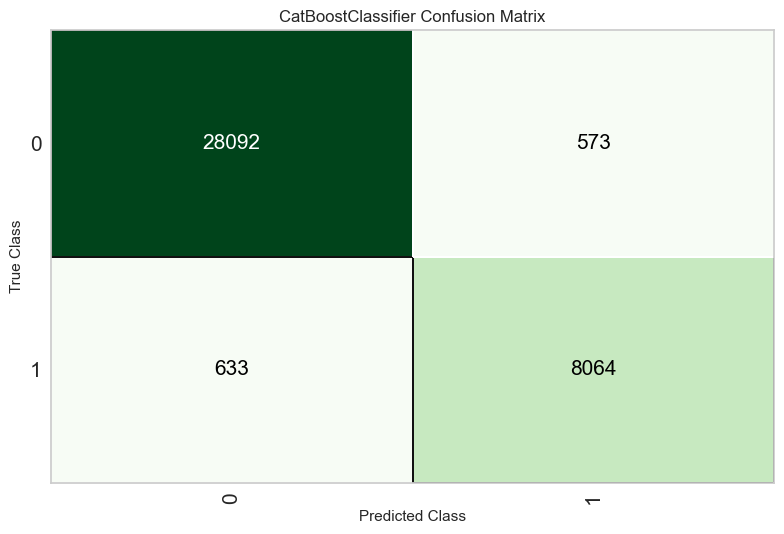

In [29]:
s.plot_model(tuned_cat_boost, plot="confusion_matrix")

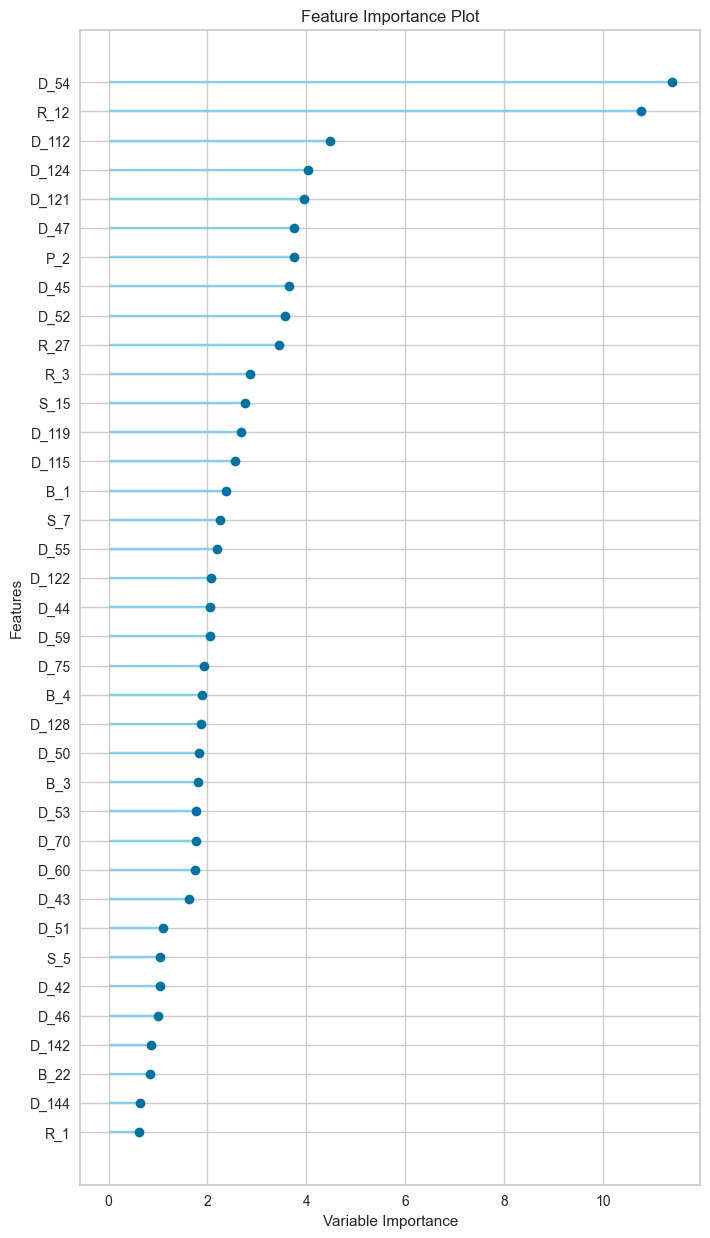

In [33]:
# check the residuals of trained model**
s.plot_model(tuned_cat_boost, plot="feature_all")

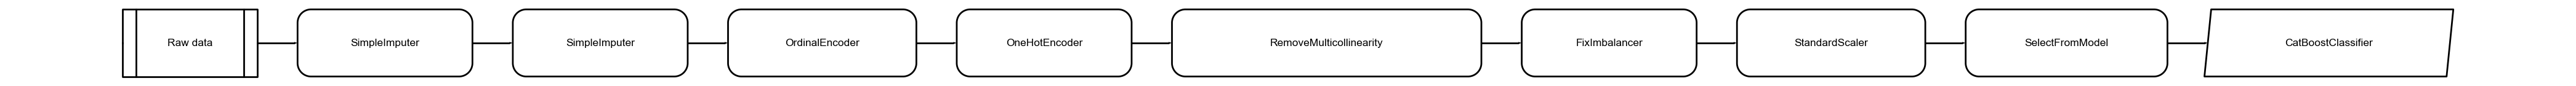

In [31]:
s.plot_model(tuned_cat_boost, plot="pipeline")

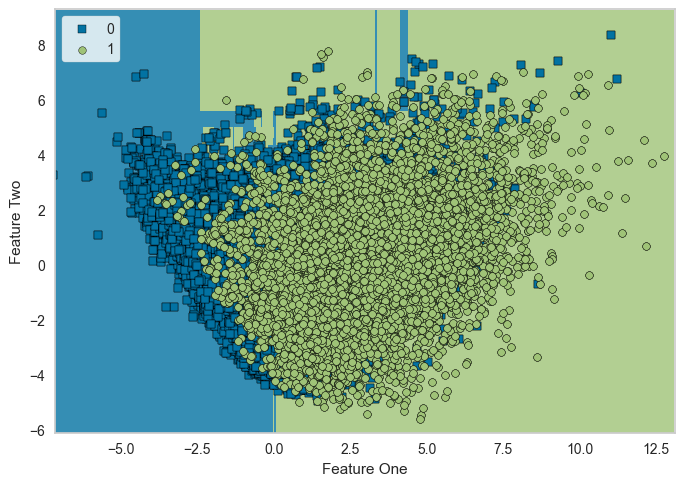

In [32]:
s.plot_model(tuned_cat_boost, plot="boundary")

In [ ]:
# s.create_app(tuned_cat_boost, app_kwargs={"title": "CatBoost"})